# Binary Classification of Svm

# Theory

Support Vector Machines (SVM) are binary classification algorithms aiming to find a hyperplane with the maximum margin, separating two classes in a high-dimensional space. Support vectors, crucial points closest to the hyperplane, determine its position. SVM can handle non-linear boundaries using a kernel function. Soft Margin SVM allows for misclassifications, balancing the trade-off between margin maximization and error minimization. The optimization involves Lagrange multipliers, and the C parameter controls regularization. The decision function predicts the class based on the new data point's position relative to the learned hyperplane. SVM is versatile, handling both linear and non-linear scenarios, making it widely used with impactful kernel and parameter choices.

In [23]:
# Importing Necessary Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [24]:
# Load the Universal Bank Data
df = pd.read_csv('UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [25]:
# Checking for null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [26]:
# Dropping ID and ZIP Code columns from the dataset
df1 = df.drop(["ID","ZIP Code"], axis = 1)
df1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


link https://www.kaggle.com/code/rajeev102001/svm-support-vector-machine-for-classification/notebook
https://www.kaggle.com/datasets/vinod00725/svm-classification?resource=download

<AxesSubplot:title={'center':'Heatmap showing Correlation between all the features'}>

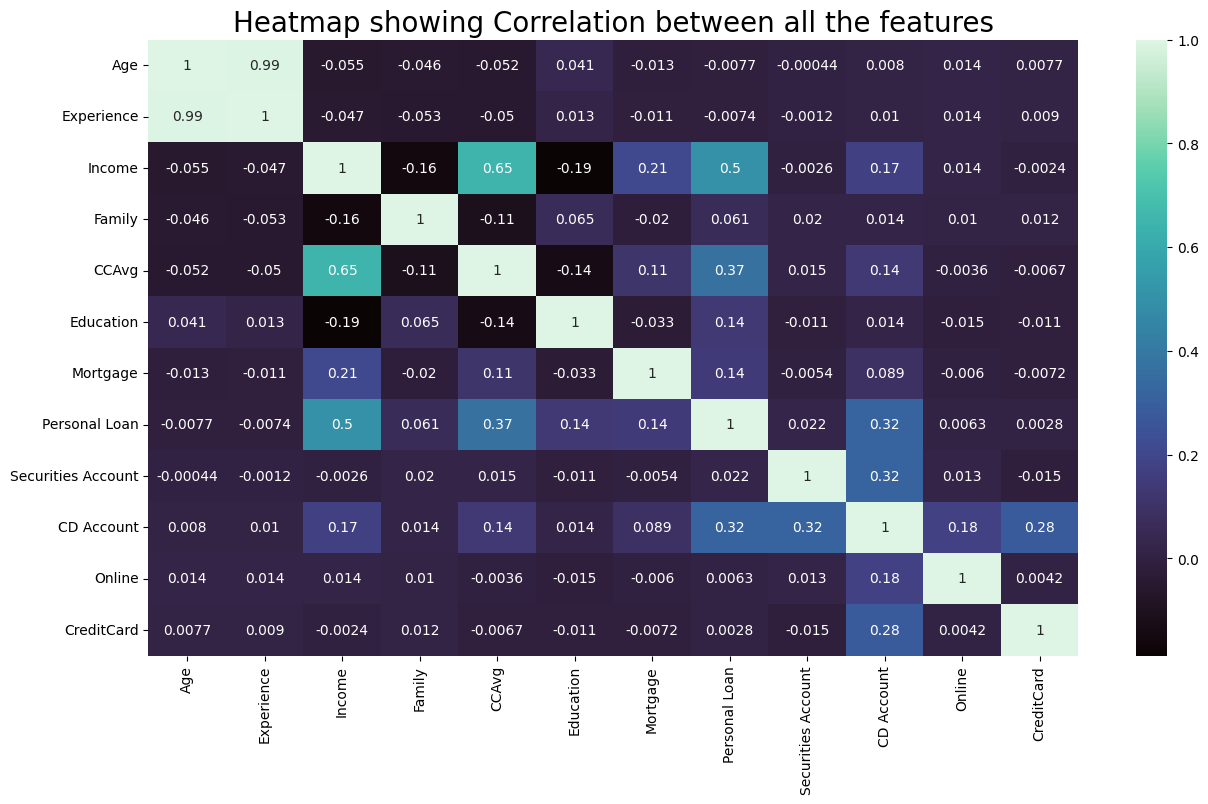

In [27]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(df1.corr(),annot = True, cmap='mako')

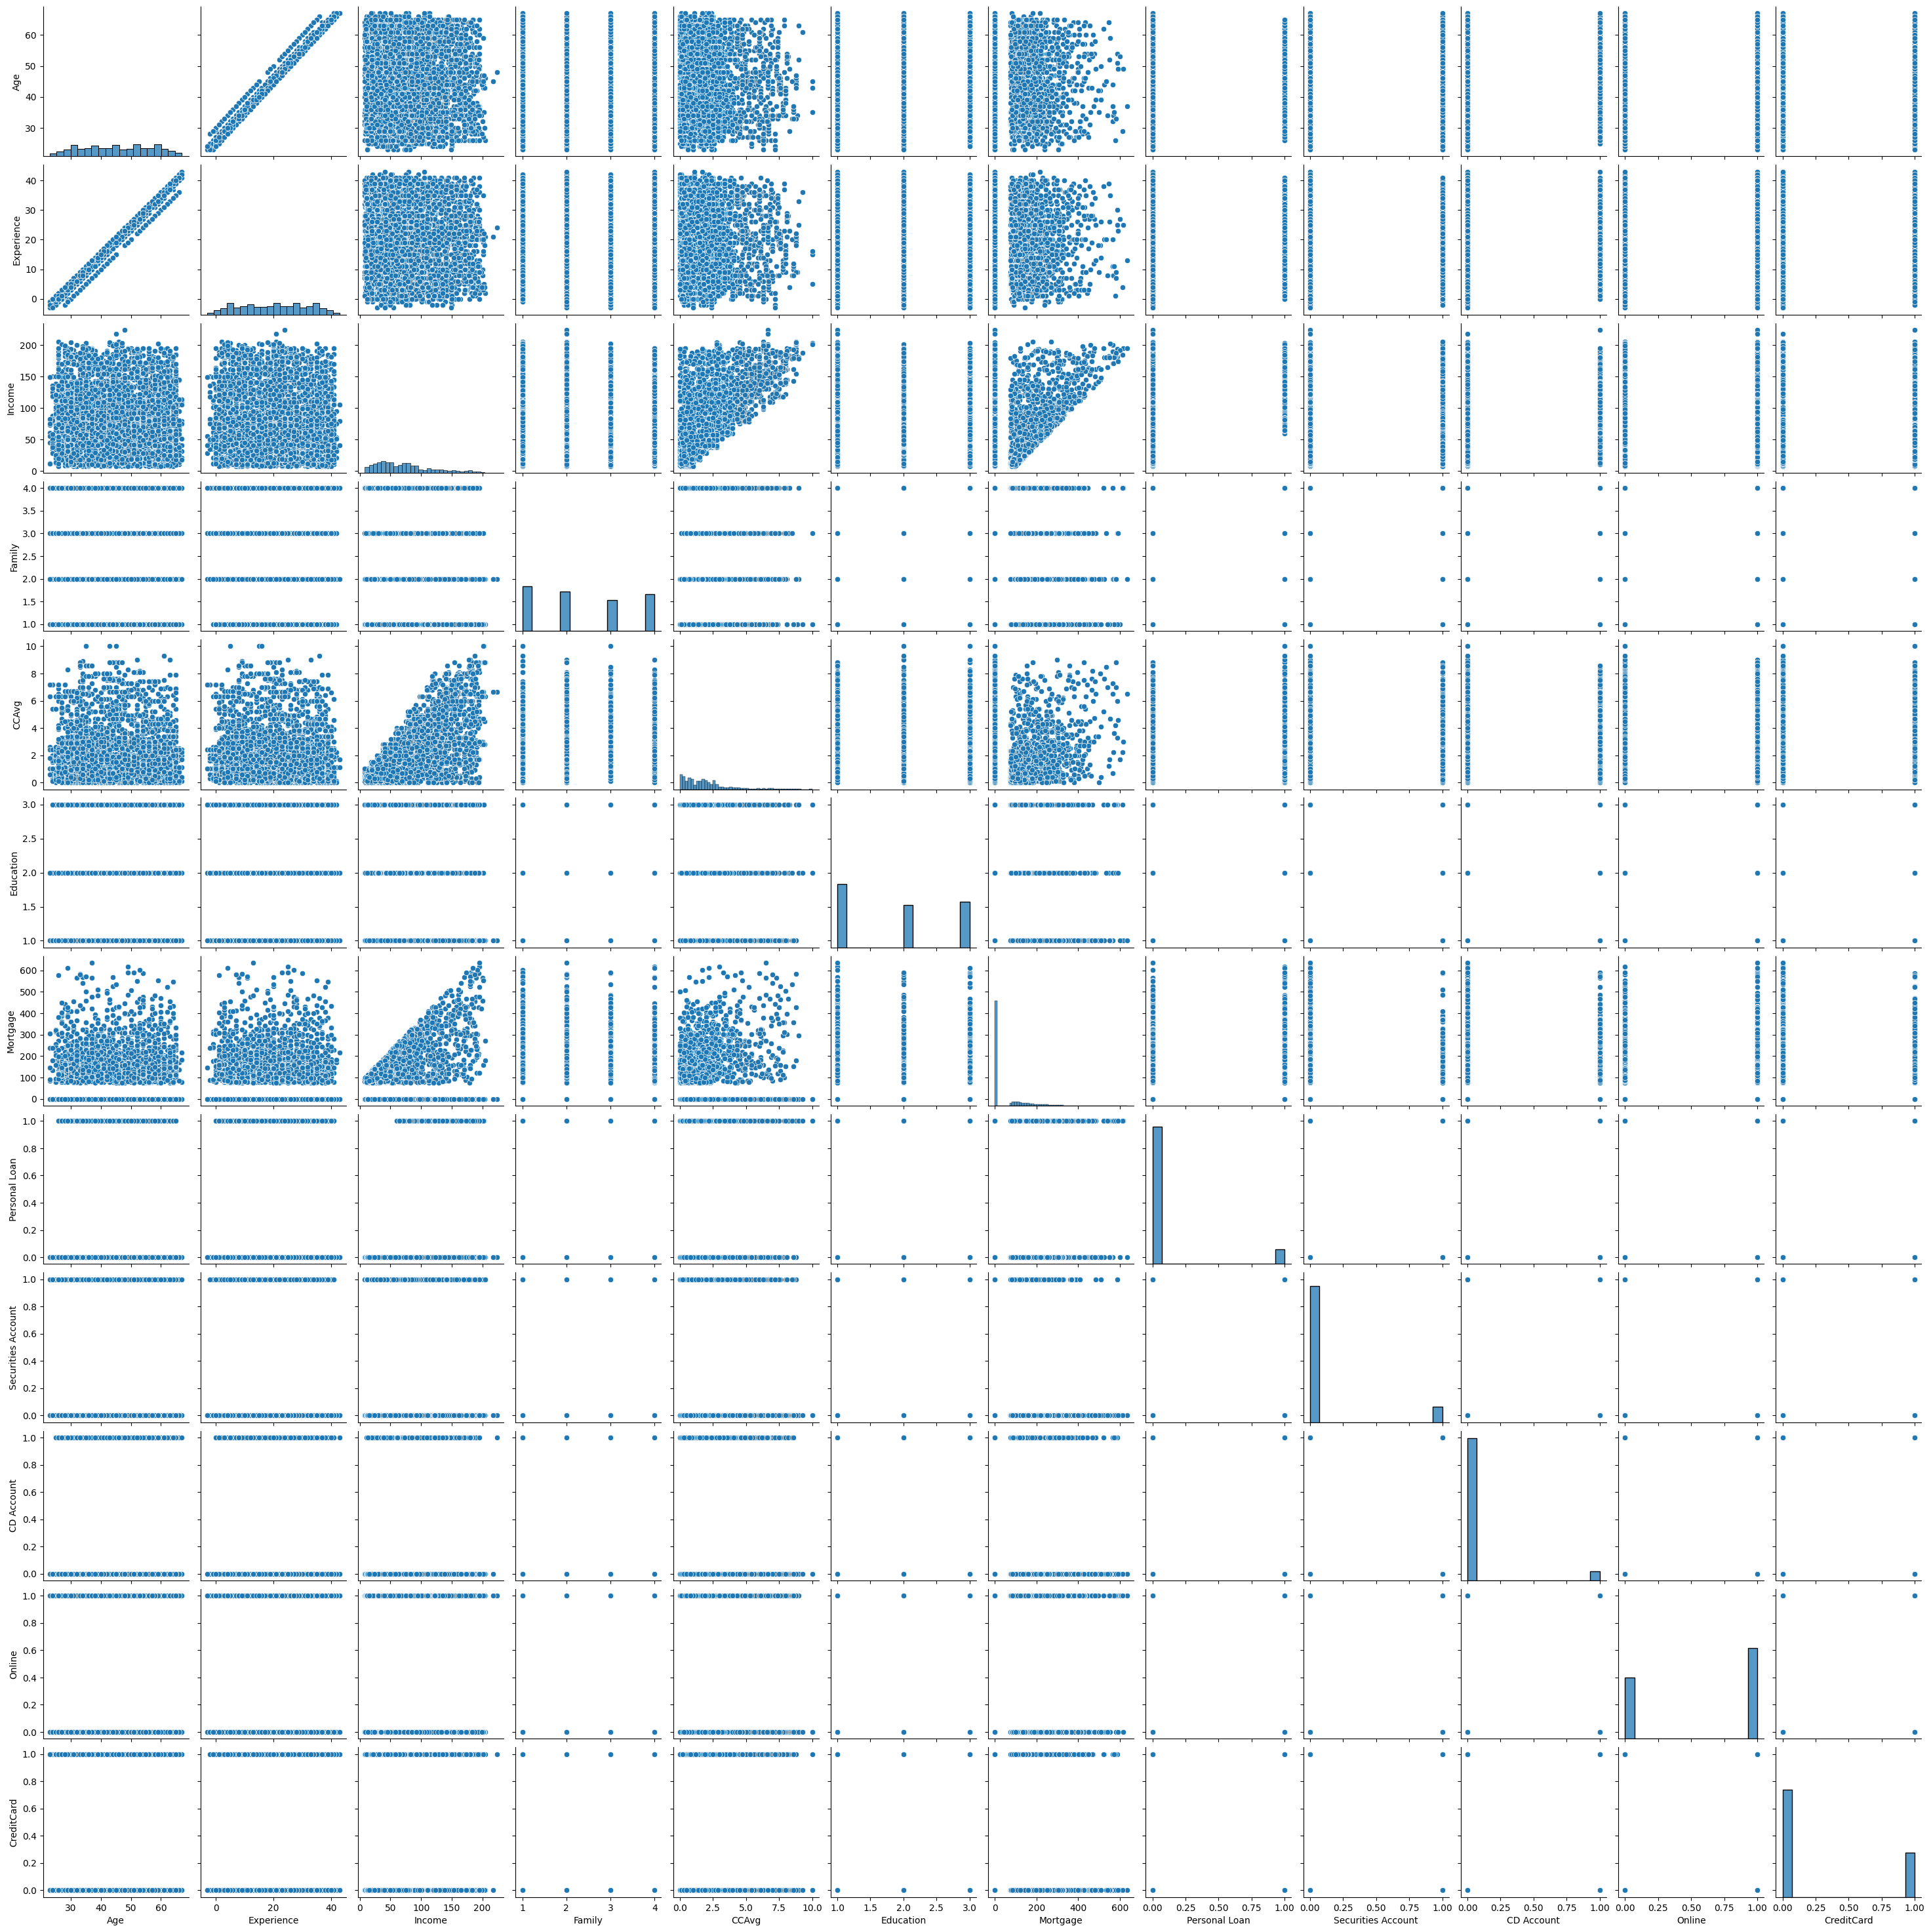

In [28]:
# Visualization of correlation results with seaborn library pairplot
sns.pairplot(df1 )

In [29]:
zero_class = df1[df1.CreditCard==0]
zero_class.shape

(3530, 12)

In [30]:
one_class = df1[df1.CreditCard==1]
one_class.shape

(1470, 12)

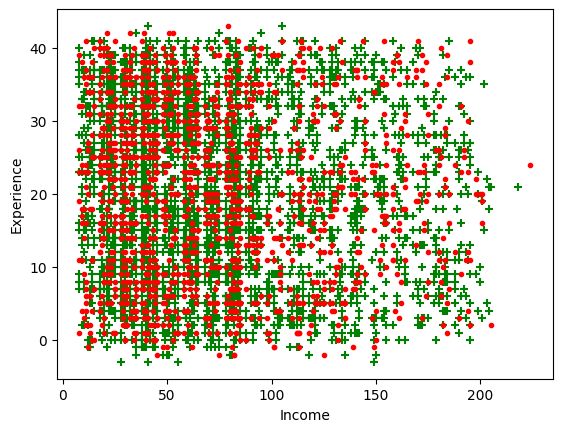

In [31]:
# Income vs Experience scatter plot
plt.xlabel('Income')
plt.ylabel('Experience')
plt.scatter(zero_class['Income'],zero_class['Experience'], color = 'green', marker='+')
plt.scatter(one_class['Income'], one_class['Experience'], color = 'red', marker='.')

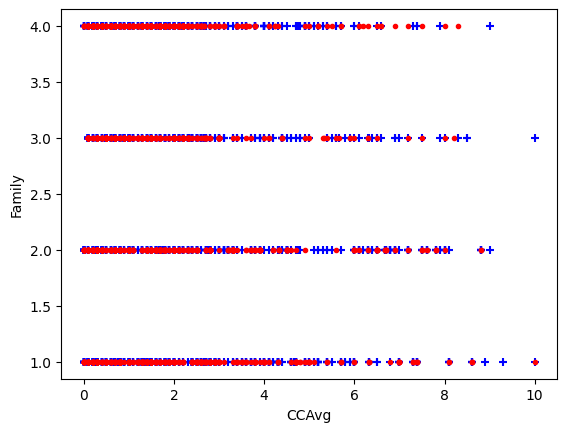

In [32]:
# CCAvg vs Family scatter plot
plt.xlabel('CCAvg')
plt.ylabel('Family')
plt.scatter(zero_class['CCAvg'],zero_class['Family'], color = 'blue', marker='+')
plt.scatter(one_class['CCAvg'], one_class['Family'], color = 'red', marker='.')

In [33]:
# Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(df1.drop('CreditCard',axis=1)).transform(df1.drop('CreditCard',axis=1))
df_scaled = pd.DataFrame(scaled, columns=df1.columns[:-1])
df_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618


In [34]:
# Splitting the columns in to dependent variable (x) and independent variable (y).
x = df_scaled
y = df1['CreditCard']

In [35]:
   
import matplotlib.pyplot as plt

<AxesSubplot:>

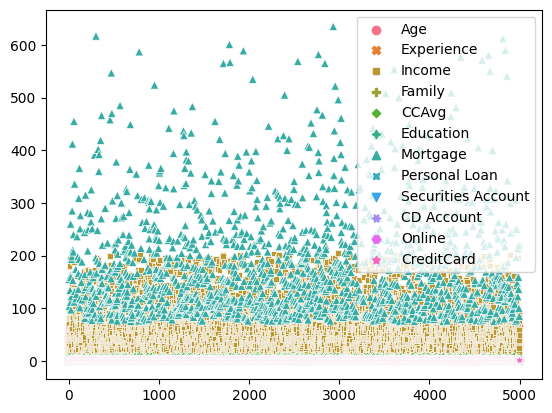

In [36]:
import seaborn
seaborn.scatterplot(data=df1)

In [37]:
import plotly.express as px
# df2 = px.data.tips()
fig = px.histogram(df1.Income)
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [38]:
# Split data in to train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [39]:
# Apply SVM Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.749


<AxesSubplot:>

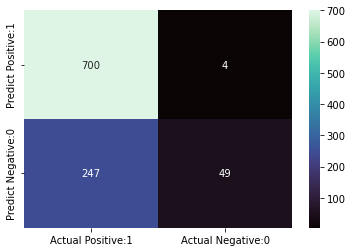

In [14]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [40]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000



In [41]:
# Apply SVM model using Linear Kernel function 
linear_classifier=SVC(kernel='linear').fit(x_train,y_train)
y_pred = linear_classifier.predict(x_test)
print('Model accuracy with linear kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with linear kernel : 0.747


<AxesSubplot:>

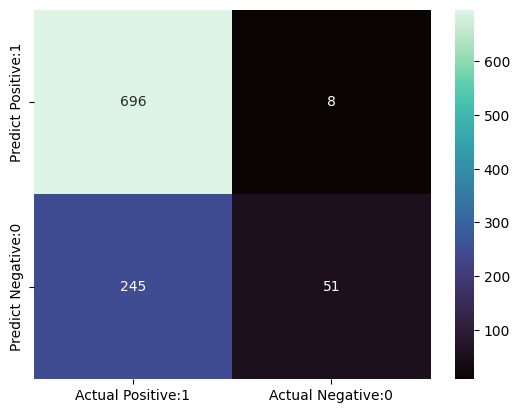

In [42]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [43]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.86      0.17      0.29       296

    accuracy                           0.75      1000
   macro avg       0.80      0.58      0.57      1000
weighted avg       0.78      0.75      0.68      1000



In [44]:
# Apply SVM model using Gaussian RBF kernel function 
rbf_svc=SVC(kernel='rbf').fit(x_train,y_train)
y_pred = rbf_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.749


<AxesSubplot:>

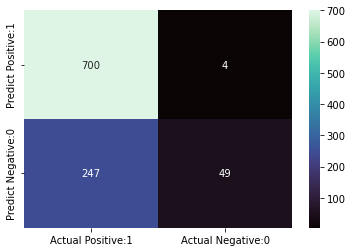

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [45]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000



In [46]:
# Apply SVM model using Polynomial Kernel function
Poly_svc=SVC(kernel='poly', C=1).fit(x_train,y_train)
y_pred = Poly_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.749


<AxesSubplot:>

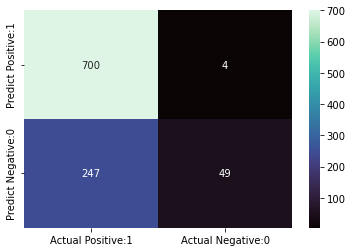

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [47]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000



In [48]:
# Apply SVM model using Sigmoid Kernel function
Poly_svc=SVC(kernel='sigmoid', C=1).fit(x_train,y_train)
y_pred = Poly_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.629


<AxesSubplot:>

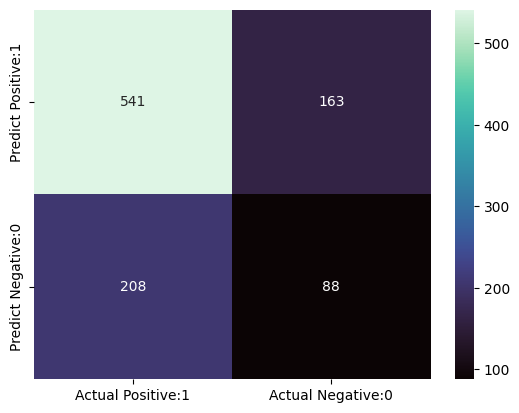

In [50]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [51]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       704
           1       0.35      0.30      0.32       296

    accuracy                           0.63      1000
   macro avg       0.54      0.53      0.53      1000
weighted avg       0.61      0.63      0.62      1000



In [52]:
from sklearn.model_selection import GridSearchCV  

In [53]:
from sklearn.linear_model import SGDClassifier 

In [54]:
from sklearn.metrics import roc_curve, auc

In [57]:
model = SGDClassifier(loss='hinge',class_weight='balanced')
model.fit(x_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class, not the predicted outputs.

y_train_pred = model.decision_function(x_train)    
y_test_pred = model.decision_function(x_test) 

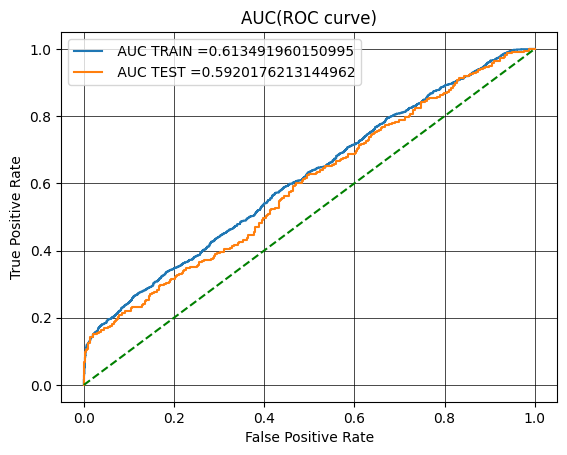

In [58]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Conclusion
Precision:

Class 0 has a precision of 0.74, indicating that when the model predicts class 0, it is correct 74% of the time.
Class 1 has a higher precision of 0.92, suggesting that predictions for class 1 are more accurate.
Recall:

Class 0 has a high recall of 0.99, indicating that the model correctly identifies 99% of the actual instances of class 0.
Class 1, however, has a lower recall of 0.17, implying that the model misses a significant portion (83%) of actual instances of class 1.
F1-Score:

The F1-score, a balance between precision and recall, is 0.85 for class 0 and a lower 0.28 for class 1. This reflects the trade-off between precision and recall for each class.
Accuracy:

The overall accuracy of the model is 75%, indicating the percentage of correctly predicted instances across both classes.
Macro and Weighted Averages:

The macro-average F1-score (0.56) and weighted average F1-score (0.68) give a summarized view of the model's performance across both classes.
Conclusion:

The model performs well in identifying instances of class 0, with high precision and recall, suggesting a strong ability to distinguish class 0 instances.
However, for class 1, the model's performance is less satisfactory, especially in terms of recall. It struggles to correctly identify instances of class 1, leading to a lower F1-score.
Further analysis and potentially model improvement are needed, especially if classifying instances of class 1 with higher recall is crucial for the application at hand.

# model We have to choose
Polynomial Kernel function,Gaussian RBF kernel function These two models have high accuracy so we have to choose these kernals for their output

# Multi Class Svm Classifier

# Training Support Vector Machines for Multiclass Classification 

# Theory

A Multi-Class Support Vector Machine (SVM) classifier extends binary SVM to handle multiple classes. Two common strategies are One-vs-One (OvO) and One-vs-All (OvA). OvO trains a binary classifier for each class pair, while OvA trains one classifier per class against the rest. Decision-making involves comparing scores from these classifiers. The kernel trick enables handling non-linear boundaries, and hyperparameter tuning involves optimizing parameters like the regularization parameter (C) and kernel choice. Evaluation metrics include accuracy, precision, recall, F1-score, and confusion matrix, offering a comprehensive assessment. Efficient training techniques, such as pairwise coupling, enhance scalability for a large number of classes.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

Load the Train and Test set

In [60]:
train = shuffle(pd.read_csv("train.csv"))
test = shuffle(pd.read_csv("test.csv"))

Frequency Distribution of the Outome

In [61]:
#Frequency distribution of classes"
train_outcome = pd.crosstab(index=train["Activity"],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0,count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


Visualizing Outcome Distribution

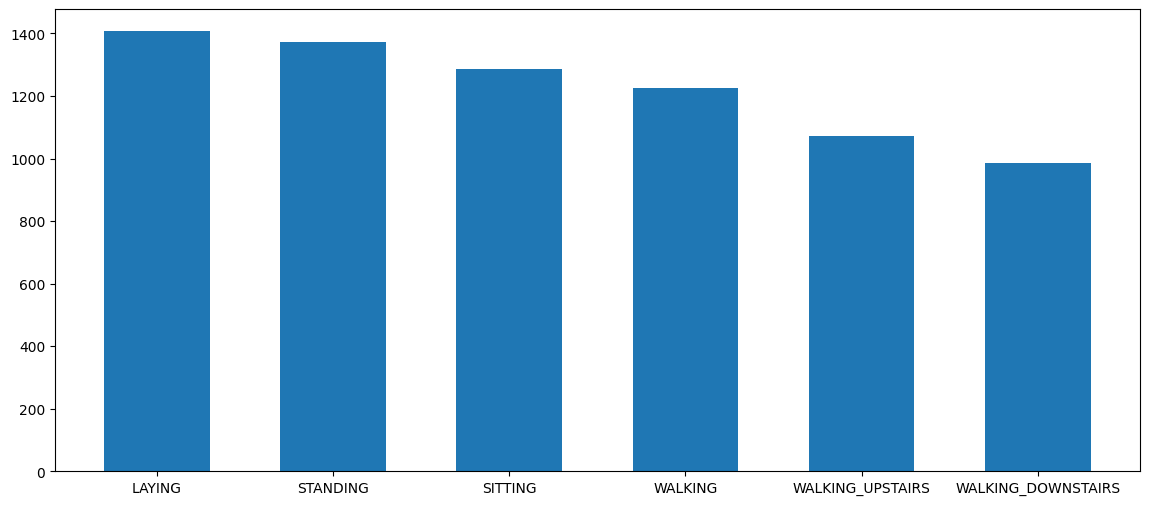

In [62]:
temp = train["Activity"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values})


labels = df['labels']
sizes = df['values']

x_pos = [i for i, _ in enumerate(labels)]

plt.figure(1, [14, 6])
plt.bar(x_pos, sizes,width=0.6)
plt.xticks(x_pos, labels)
plt.show()

Normalize the Predictor(Feature Set) for SVM training

In [63]:
# Seperating Predictors and Outcome values from train and test sets
X_train = pd.DataFrame(train.drop(['Activity','subject'],axis=1))
Y_train_label = train.Activity.values.astype(object)

X_test = pd.DataFrame(test.drop(['Activity','subject'],axis=1))
Y_test_label = test.Activity.values.astype(object)

# Dimension of Train and Test set 
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)

# encoding test labels 
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)

#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)
#list(set(X_train.columns) - set(num_cols))


names_of_predictors = list(X_train.columns.values)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dimension of Train set (7352, 561)
Dimension of Test set (2947, 561) 

Number of numeric features: 561


Hyperparameter tuning using grid search and cross validation

In [64]:
final_model = SVC(kernel='rbf', gamma=0.001, C=1000)
final_model.fit(X_train_scaled, Y_train)

SVC(C=1000, gamma=0.001)

In [65]:
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , Y_test ))

Training set score for SVM: 1.000000
Testing  set score for SVM: 0.958941


In [66]:
# Making the Confusion Matrix
print(confusion_matrix(Y_test_label,Y_pred_label))
print("\n")
print(classification_report(Y_test_label,Y_pred_label))

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , Y_test ))

[[537   0   0   0   0   0]
 [  3 439  48   0   0   1]
 [  0  11 521   0   0   0]
 [  0   0   0 486   4   6]
 [  0   0   0   6 389  25]
 [  0   0   0  15   2 454]]


                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       537
           SITTING       0.98      0.89      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.98      0.97       496
WALKING_DOWNSTAIRS       0.98      0.93      0.95       420
  WALKING_UPSTAIRS       0.93      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

Training set score for SVM: 1.000000
Testing  set score for SVM: 0.958941


In [67]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[537   0   0   0   0   0]
 [  3 439  48   0   0   1]
 [  0  11 521   0   0   0]
 [  0   0   0 486   4   6]
 [  0   0   0   6 389  25]
 [  0   0   0  15   2 454]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.  ]
 [0.01 0.89 0.1  0.   0.   0.  ]
 [0.   0.02 0.98 0.   0.   0.  ]
 [0.   0.   0.   0.98 0.01 0.01]
 [0.   0.   0.   0.01 0.93 0.06]
 [0.   0.   0.   0.03 0.   0.96]]


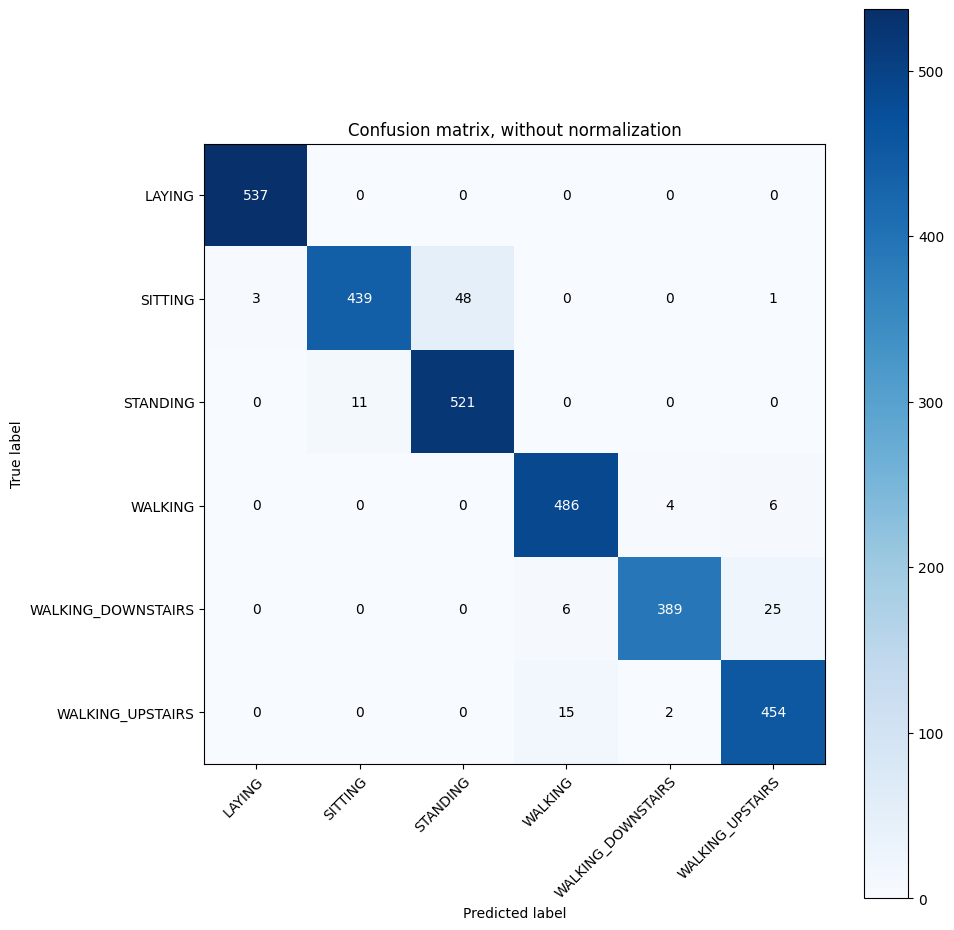

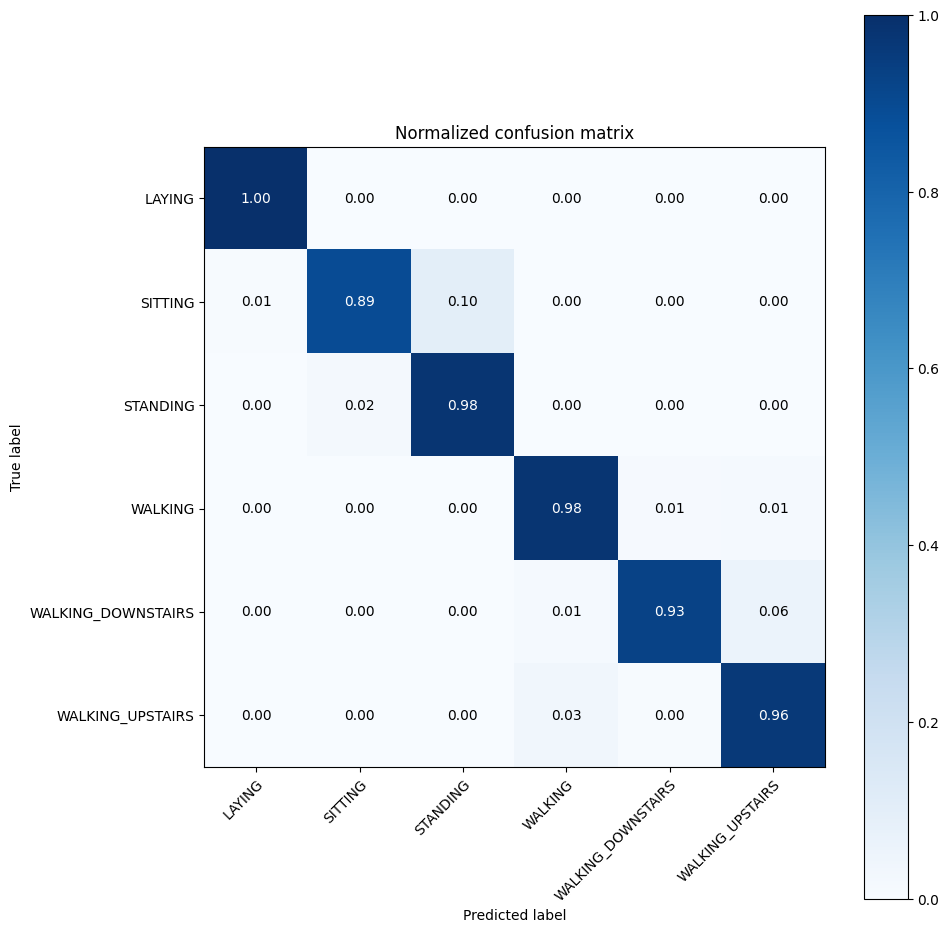

In [68]:
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_test_label, Y_pred_label, classes=labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(Y_test_label, Y_pred_label, classes=labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [69]:
from sklearn.model_selection import GridSearchCV 

In [70]:
from sklearn.linear_model import SGDClassifier 

In [71]:
from sklearn.metrics import roc_curve, auc

In [73]:
model = SGDClassifier(loss='hinge',class_weight='balanced')
model.fit(X_train, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class, not the predicted outputs.

y_train_pred = model.decision_function(X_train)    
y_test_pred = model.decision_function(X_test) 

In [76]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [78]:
model = SGDClassifier(loss='hinge',class_weight='balanced')
model.fit(x_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class, not the predicted outputs.

y_train_pred = model.decision_function(x_train)    
y_test_pred = model.decision_function(x_test) 

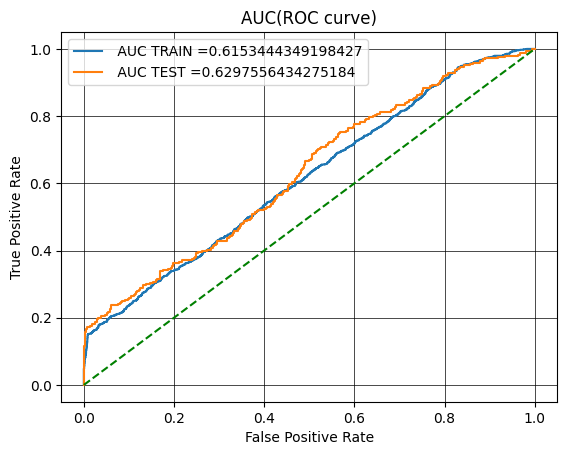

In [79]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Conclusion
The provided classification report summarizes the performance of a Multi-Class Support Vector Machine (SVM) classifier on a dataset with six classes. Here's a concise interpretation:

Confusion Matrix:

The confusion matrix shows the number of instances each class was correctly or incorrectly classified. For instance, class "LAYING" has 537 true positives, and there are no false positives or false negatives.
Precision, Recall, and F1-Score:

Precision measures the accuracy of positive predictions, recall gauges the proportion of actual positives correctly predicted, and F1-score is the harmonic mean of precision and recall.
The classifier achieves high precision, recall, and F1-scores for most classes, indicating effective classification performance.
Accuracy:

The overall accuracy of the model is 96%, suggesting that the majority of instances across all classes are correctly classified.
Support:

Support represents the number of actual occurrences of each class in the specified dataset.
Training and Testing Scores:

The training set score is 1.0, indicating perfect accuracy on the training data.
The testing set score is 0.959, suggesting good generalization performance on unseen data.
Conclusion:

The SVM classifier demonstrates excellent performance across all classes, with high precision, recall, and F1-scores, leading to an impressive overall accuracy of 96%.
The model exhibits good generalization from the training set to the testing set, reinforcing its robustness.
This classification report suggests that the SVM classifier is effective in accurately categorizing activities within the given dataset.